In [38]:
import numpy as np
from dezero import Variable, Model, optimizers
import dezero.functions as F
import dezero.layers as L
from collections import defaultdict
from common.gridworld import GridWorld

x_np = np.array(5.0)
x = Variable(x_np)
y = 3 * x ** 2
print(y)

variable(75.0)


In [39]:
y.backward()
print(x.grad)

variable(30.0)


In [40]:
a = Variable(np.array([1, 2, 3]))
b = Variable(np.array([4, 5, 6]))
print(F.matmul(a, b))
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
print(F.matmul(a, b))

variable(32)
variable([[19 22]
          [43 50]])


In [41]:
def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y


x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

variable(-2.0) variable(400.0)


In [42]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

lr = 0.001
iters = 10000

for i in range(iters):
    print(x0, x1)
    y = rosenbrock(x0, x1)
    x0.cleargrad()
    x1.cleargrad()
    y.backward()

    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data
print(x0, x1)

variable(0.0) variable(2.0)
variable(0.002) variable(1.6)
variable(0.0052759968) variable(1.2800008)
variable(0.009966698110960038) variable(1.0240062072284468)
variable(0.01602875299014943) variable(0.8192248327970044)
variable(0.02324750923068761) variable(0.6554312504220874)
variable(0.031290846214210376) variable(0.5244530896747561)
variable(0.039780241951514035) variable(0.41975829515116514)
variable(0.04835473570612382) variable(0.3361231296508763)
variable(0.05671405943493354) variable(0.26936613981374286)
variable(0.06463840226323121) variable(0.2161362087585121)
variable(0.07198937826156711) variable(0.17374459161623834)
variable(0.07869927242171229) variable(0.14003216740948807)
variable(0.08475507379959696) variable(0.11326444902353183)
variable(0.0901819257435144) variable(0.0920482437257805)
variable(0.09502862514911821) variable(0.07526515092678615)
variable(0.09935624532071949) variable(0.062018208660975245)
variable(0.10322996680416148) variable(0.05158889962562639)
var

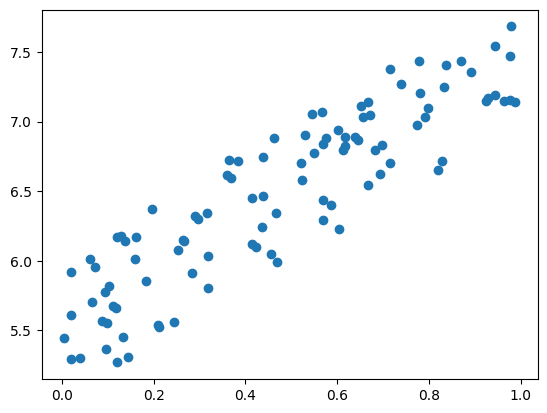

In [43]:
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
plt.scatter(x, y)
plt.show()

In [44]:
x, y = Variable(x), Variable(y)
W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))


def predict(x):
    y = F.matmul(x, W) + b
    return y

In [45]:
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)


lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)
    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    if i % 10 == 0:
        print(loss.data)

print('=======')
print('W=', W.data)
print('b=', b.data)

42.296340129442335
0.24915731977561134
0.10078974954301652
0.09461859803040694
0.0902667138137311
0.08694585483964615
0.08441084206493275
0.08247571022229121
0.08099850454041051
0.07987086218625004
W= [[2.11807369]]
b= [5.46608905]


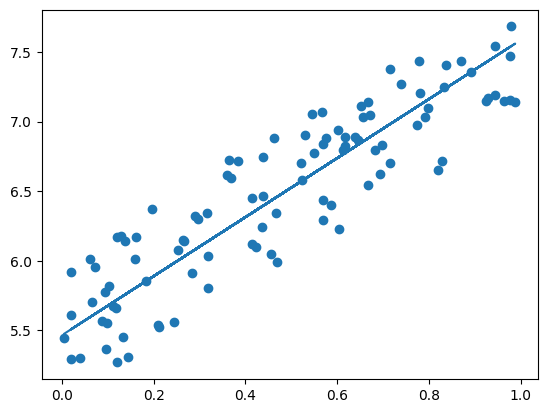

In [46]:
plt.scatter(x.data, y.data)
y_pred = predict(x)
plt.plot(x.data, y_pred.data)
plt.show()

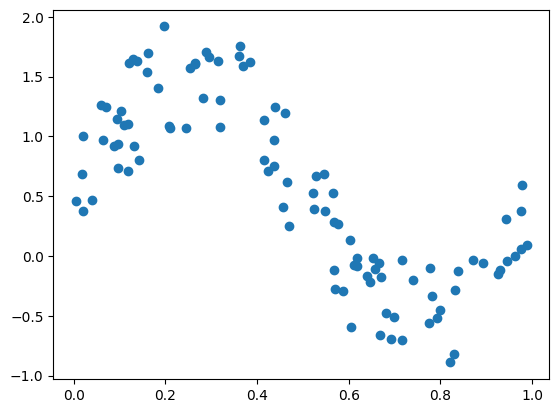

In [47]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

plt.scatter(x, y)
plt.show()

In [48]:
I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))


def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y


lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()

    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0:
        print(loss.data)

0.8473695850105871
0.2514286285183607
0.24759485466749878
0.23786120447054832
0.21222231333102953
0.16742181117834223
0.0968193261999272
0.07849528290602335
0.07749729552991157
0.07722132399559317


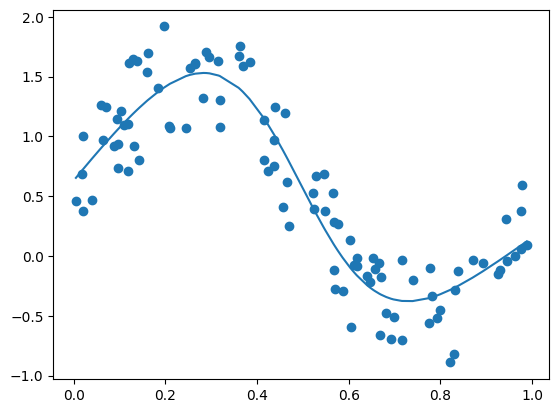

In [49]:
plt.scatter(x, y)
x1 = np.sort(x.reshape(-1)).reshape(-1, 1)
y_pred = predict(x1)
plt.plot(x1, y_pred.data)
plt.show()

In [50]:
linear = L.Linear(10)
batch_size, input_size = 100, 5
x = np.random.randn(batch_size, input_size)
y = linear(x)

print('y shape:', y.shape)
print('params shape:', linear.W.shape, linear.b.shape)

for param in linear.params():
    print(param.name, param.shape)

y shape: (100, 10)
params shape: (5, 10) (10,)
b (10,)
W (5, 10)


variable(0.8170093157779219)
variable(0.20802225399126958)
variable(0.22548854428677292)
variable(0.2114541266963946)
variable(0.21861109742169327)
variable(0.2196346607711906)
variable(0.2159879822923846)
variable(0.2126777797591852)
variable(0.2142457122267934)
variable(0.2199244925834768)


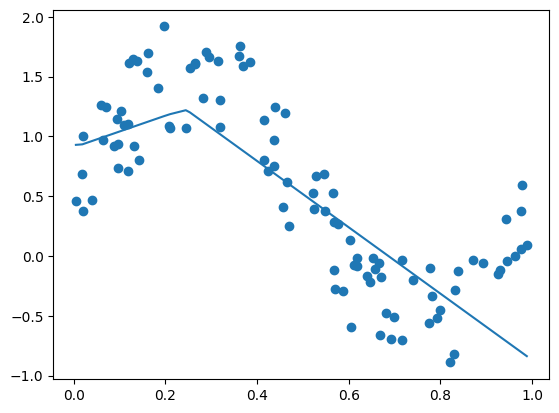

In [51]:
class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        x = F.relu(self.l1(x))
        return self.l2(x)


np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
iters = 10000

model = TwoLayerNet(10, 1)
optimizer = optimizers.SGD(lr)
optimizer.setup(model)

for i in range(iters):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    optimizer.update()
    if i % 1000 == 0:
        print(loss)

plt.scatter(x, y)
x1 = np.sort(x.reshape(-1)).reshape(-1, 1)
y_pred = model(x1)
plt.plot(x1, y_pred.data)
plt.show()

In [52]:
def one_hot(state):
    height, width = 3, 4
    vec = np.zeros(height * width, dtype=np.float32)
    y, x = state
    idx = y * width + x
    vec[idx] = 1.0
    return vec.reshape(1, -1)


state = (2, 0)
x = one_hot(state)

print(x.shape)
print(x)

(1, 12)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [53]:
Q = defaultdict(lambda: 0)
state = (2, 0)
action = 0
print(Q[state, action])

0


In [54]:
class QNet(Model):
    def __init__(self):
        super().__init__()
        self.l1 = L.Linear(100)
        self.l2 = L.Linear(4)

    def forward(self, x):
        x = F.relu(self.l1(x))
        return self.l2(x)


qnet = QNet()

state = (2, 0)
state = one_hot(state)
qs = qnet(state)
print(qs.shape)

(1, 4)


In [55]:
class QLearningAgent:
    def __init__(self):
        self.gamma = 0.9
        self.lr = 0.01
        self.epsilon = 0.1
        self.action_size = 4

        self.qnet = QNet()
        self.trainer = optimizers.SGD(self.lr)
        self.trainer.setup(self.qnet)

    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_size)
        else:
            qs = self.qnet(state)
            return qs.data.argmax()

    def update(self, state, action, reward, next_state, done):
        if done:
            next_q = np.zeros(1)
        else:
            next_qs = self.qnet(next_state)
            next_q = next_qs.max(axis=1)
            next_q.unchain()

        target = self.gamma * next_q + reward
        qs = self.qnet(state)
        q = qs[:, action]
        loss = F.mean_squared_error(target, q)

        self.qnet.cleargrads()
        loss.backward()
        self.trainer.update()

        return loss.data

In [56]:
env = GridWorld()
agent = QLearningAgent()

episodes = 1000
loss_history = []

for episode in range(episodes):
    state = env.reset()
    state = one_hot(state)
    total_loss, cnt = 0, 0
    done = False

    while not done:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        next_state = one_hot(next_state)

        loss = agent.update(state, action, reward, next_state, done)
        total_loss += loss
        cnt += 1
        state = next_state

    average_loss = total_loss / cnt
    loss_history.append(average_loss)

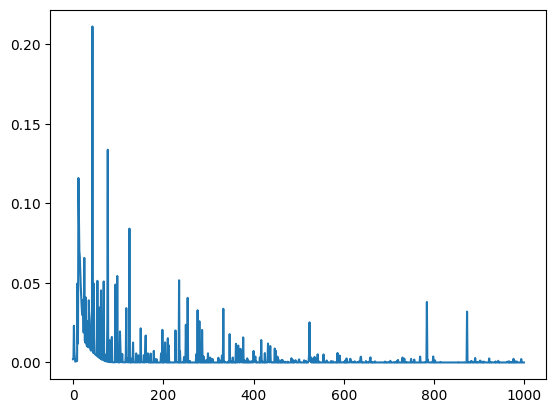

In [59]:
loss_his = [ls.item() for ls in loss_history]
plt.plot(loss_his)
plt.show()

defaultdict(<function <lambda> at 0x0000017C73BF5940>, {((0, 0), 0): 0.3852415937348885, ((0, 0), 1): 0.6165449535572404, ((0, 0), 2): 0.4463691167893128, ((0, 0), 3): 0.4062648293929874, ((0, 1), 0): 0.5275461686750651, ((0, 1), 1): 0.7480598279629225, ((0, 1), 2): 0.6118573412534667, ((0, 1), 3): 0.8871637644836732, ((0, 2), 0): 0.889025260109683, ((0, 2), 1): 0.8557488224247713, ((0, 2), 2): 0.7836470154153035, ((0, 2), 3): 0.9980393130584075, ((0, 3), 0): 0.5410107979204308, ((0, 3), 1): 0.46699970734887264, ((0, 3), 2): 0.4305415500826559, ((0, 3), 3): 0.5834010153941641, ((1, 0), 0): 0.40307183714493333, ((1, 0), 1): 0.6016514817912008, ((1, 0), 2): 0.5502835184720454, ((1, 0), 3): 0.3202941700296649, ((1, 1), 0): 0.46791554182560113, ((1, 1), 1): 0.3083252502947407, ((1, 1), 2): 0.7324904519190629, ((1, 1), 3): 0.3505398352049626, ((1, 2), 0): 0.8978317947777271, ((1, 2), 1): 0.7393488477137948, ((1, 2), 2): 0.8047200724819331, ((1, 2), 3): 0.018953932734815965, ((1, 3), 0): 1.0

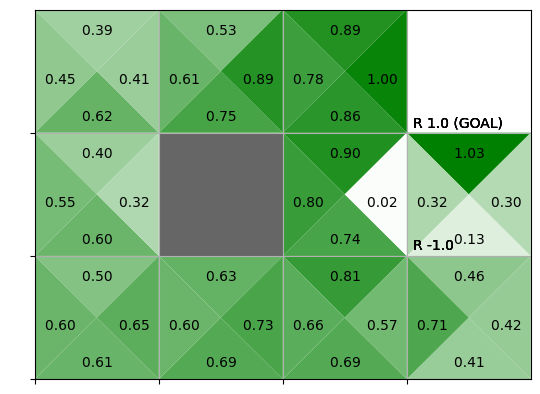

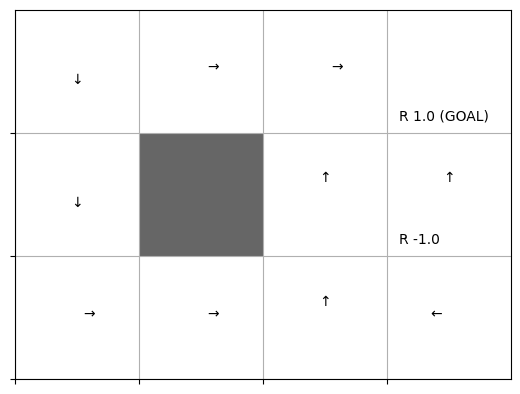

In [76]:
Q.clear()
for state in range(12):
    st = (state // 4, state % 4)
    qs = agent.qnet(one_hot(st))
    for i, q in enumerate(qs.data.reshape(-1)):
        Q[st, i] = q.item()
print(Q)
env.render_q(Q)